In [ ]:
pip install dash

In [ ]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import output
import threading
import dash
from dash import dcc  # dash core components
from dash import html  # dash html components
from dash.dependencies import Input, Output
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
covid_data = pd.read_csv('/content/drive/My Drive/project_1_python.csv')

In [ ]:
covid_data

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180472,190608,ZWE,Africa,Zimbabwe,2022-06-14,254155.0,0.0,5521.0,0.0,NaN,...,6270096.0,4563366.0,1026048.0,NaN,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180473,190609,ZWE,Africa,Zimbabwe,2022-06-15,254387.0,232.0,5525.0,4.0,NaN,...,6271703.0,4567466.0,1027822.0,7481.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180474,190610,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,5526.0,1.0,NaN,...,6274305.0,4570349.0,1029463.0,7126.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180475,190611,ZWE,Africa,Zimbabwe,2022-06-17,254753.0,251.0,5533.0,7.0,NaN,...,6276402.0,4574222.0,1031790.0,8297.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0


In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [ ]:
latest_dates = covid_data.groupby('location')['date'].max().reset_index()
covid_latest = covid_data.merge(latest_dates, on=['location', 'date'])
covid_latest

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,845,AFG,Asia,Afghanistan,2022-06-18,181574.0,40.0,7713.0,0.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1690,ALB,Europe,Albania,2022-06-18,277141.0,NaN,3497.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2872934.0,38.0,11803.431,78.57,41.0,20.0
2,2535,DZA,Africa,Algeria,2022-06-18,265971.0,3.0,6875.0,0.0,NaN,...,NaN,NaN,NaN,NaN,44616626.0,29.1,13913.839,76.88,28.0,3.0
3,3374,AND,Europe,Andorra,2022-06-18,43449.0,NaN,153.0,0.0,NaN,...,NaN,NaN,NaN,NaN,77354.0,NaN,NaN,83.73,42.5,1.6
4,4195,AGO,Africa,Angola,2022-06-18,99761.0,0.0,1900.0,0.0,NaN,...,NaN,NaN,NaN,NaN,33933611.0,16.8,5819.495,61.15,-12.5,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,188167,WLF,Oceania,Wallis and Futuna,2022-06-18,454.0,0.0,7.0,0.0,NaN,...,NaN,NaN,NaN,NaN,11094.0,NaN,NaN,79.94,-13.3,-176.2
222,188168,ESH,Africa,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,611872.0,28.4,NaN,70.26,24.5,-13.0
223,188968,YEM,Asia,Yemen,2022-06-18,11823.0,0.0,2149.0,0.0,NaN,...,NaN,NaN,NaN,NaN,30490639.0,20.3,1479.147,66.12,15.0,48.0
224,189791,ZMB,Africa,Zambia,2022-06-18,324025.0,NaN,3992.0,0.0,NaN,...,NaN,NaN,NaN,NaN,18920657.0,17.7,3689.251,63.89,-15.0,30.0


In [ ]:
covid_total_cases=covid_latest.groupby('location', as_index=False)['total_cases'].sum()
covid_total_cases

,location,total_cases
0,Afghanistan,181574.0
1,Albania,277141.0
2,Algeria,265971.0
3,Andorra,43449.0
4,Angola,99761.0
...,...,...
221,Wallis and Futuna,454.0
222,Western Sahara,0.0
223,Yemen,11823.0
224,Zambia,324025.0


In [ ]:
covid_geo = covid_latest[['location','latitude','longitude']]
# covid_geo = covid_geo.drop_duplicates(subset='location', keep='first', inplace=False)
covid_geo

,location,latitude,longitude
0,Afghanistan,33.0,65.0
1,Albania,41.0,20.0
2,Algeria,28.0,3.0
3,Andorra,42.5,1.6
4,Angola,-12.5,18.5
...,...,...,...
221,Wallis and Futuna,-13.3,-176.2
222,Western Sahara,24.5,-13.0
223,Yemen,15.0,48.0
224,Zambia,-15.0,30.0


In [ ]:
# covid_data_sorted=covid_data.drop_duplicates(subset='location', keep='first', inplace=False)
covid_data_top_10 = covid_latest.sort_values('population', ascending=False).head(10)

In [ ]:
covid_data_top_10

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
40,36039,CHN,Asia,China,2022-06-18,887201.0,202.0,5226.0,0.0,NaN,...,NaN,NaN,NaN,597000.0,1.444216e+09,38.7,15308.712,76.91,35.0,105.0
90,77932,IND,Asia,India,2022-06-18,43296692.0,12899.0,524855.0,15.0,NaN,...,1.014572e+09,905029095.0,39667541.0,1623721.0,1.393409e+09,28.2,6426.674,69.66,20.0,77.0
213,180268,USA,North America,United States,2022-06-18,86230982.0,14564.0,1013377.0,19.0,NaN,...,NaN,NaN,NaN,NaN,3.329151e+08,38.3,54225.446,78.86,38.0,-97.0
91,78771,IDN,Asia,Indonesia,2022-06-18,6066908.0,1264.0,156684.0,5.0,NaN,...,NaN,NaN,NaN,NaN,2.763618e+08,29.3,11188.744,71.72,-5.0,120.0
151,127985,PAK,Asia,Pakistan,2022-06-18,1531982.0,152.0,30383.0,0.0,NaN,...,1.361322e+08,124633798.0,15333936.0,724751.0,2.251999e+08,23.5,5034.708,67.27,30.0,70.0
26,23478,BRA,South America,Brazil,2022-06-18,31611769.0,NaN,668693.0,NaN,NaN,...,1.844318e+08,168262637.0,101900962.0,104586.0,2.139934e+08,33.5,14103.452,75.88,-10.0,-55.0
144,123118,NGA,Africa,Nigeria,2022-06-18,256573.0,106.0,3144.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2.114007e+08,18.1,5338.454,54.69,10.0,8.0
15,13495,BGD,Asia,Bangladesh,2022-06-18,1955731.0,304.0,29131.0,0.0,NaN,...,1.292121e+08,118590639.0,27778457.0,NaN,1.663035e+08,27.5,3523.984,72.59,24.0,90.0
165,139331,RUS,Europe,Russia,2022-06-18,18126576.0,3319.0,372707.0,65.0,NaN,...,8.152933e+07,74284589.0,14585381.0,355150.0,1.459120e+08,39.6,24765.954,72.58,60.0,100.0
126,108078,MEX,North America,Mexico,2022-06-18,5852596.0,NaN,325340.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.302622e+08,29.3,17336.469,75.05,23.0,-102.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'China'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Bangladesh'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Mexico')])

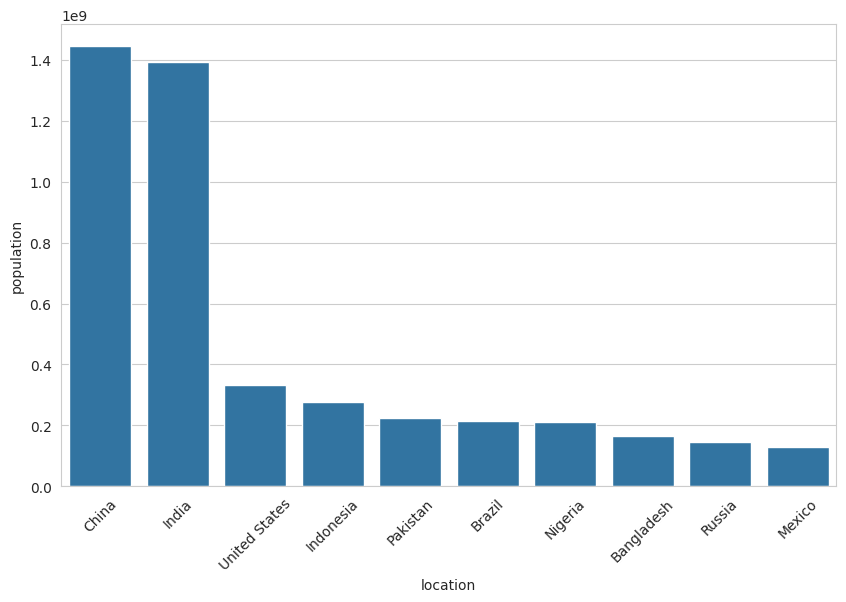

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=covid_data_top_10,
    x="location",
    y="population"
  ),
sns.set_style('whitegrid')
plt.xticks(rotation=45)

In [ ]:
chart_lifeexp_pop = px.scatter(
    covid_latest,
    x='population',
    y='life_expectancy',
    color='continent',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    log_x=True,
    trendline='ols',
    trendline_scope='overall',
    trendline_options=dict(log_x=True),
    title='Population vs Life Expectancy')


chart_lifeexp_pop.show()

In [ ]:
covid_total_cases_pl_vs_ger = covid_data[covid_data['location'].isin(['Poland','Germany'])][['location','date','total_cases']]

In [ ]:
covid_total_cases

,location,total_cases
0,Afghanistan,181574.0
1,Albania,277141.0
2,Algeria,265971.0
3,Andorra,43449.0
4,Angola,99761.0
...,...,...
221,Wallis and Futuna,454.0
222,Western Sahara,0.0
223,Yemen,11823.0
224,Zambia,324025.0


In [ ]:
chart_total_cases_time = px.line(
    covid_total_cases_pl_vs_ger,
    x='date',
    y='total_cases',
    color='location',
    color_discrete_map={
        'Poland': 'purple',
        'Germany': 'yellow'
    },
    title='Poland vs Germany total cases')

chart_total_cases_time.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
my_access_token='pk.eyJ1IjoiamFrb2JvMTczIiwiYSI6ImNseDdta2ExbjAybjQyanI0Ym1reWlqNGIifQ.CgGCpQjhr0P6kZyMS7CEiw'

In [ ]:
px.set_mapbox_access_token(my_access_token)

In [ ]:
covid_latest['total_cases_population_ratio'] = covid_latest['total_cases'] / covid_latest['population']
covid_latest['total_cases_population_ratio'] = covid_latest['total_cases_population_ratio'].fillna(0)

In [ ]:
covid_map=px.scatter_mapbox(covid_latest,
                                  lat='latitude',
                                  lon='longitude',
                                  color='continent',
                                  size='total_cases_population_ratio',
                                  color_discrete_sequence=px.colors.qualitative.Vivid,
                                  zoom=1,
                                  center={'lat': 0, 'lon': 0},
                                  size_max=15,  # Adjust this value to control maximum marker size
                                  hover_name='location',  # Show the country name on hover
                                  hover_data={'total_cases': True, 'continent': False,'latitude':False, 'longitude':False, 'total_cases_population_ratio': False},  # Show total cases, hide ratio
                                  title='All Covid-19 cases across countries'
)

covid_map.update_layout(
    mapbox_style='dark',
    autosize=True,
    width=1300,
    height=800,
)
covid_map.show()

In [ ]:
df_dash_1 = covid_data

In [ ]:
countries_list = list(df_dash_1['location'].drop_duplicates())

In [ ]:
first_dash_app = dash.Dash()

first_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose country:"),
    dcc.Dropdown(
        id='country',
        options=[{'value': str(country), 'label': country}
                 for country in countries_list],
        value=countries_list[0]
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
    ])

])


In [ ]:
@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cummulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig

In [ ]:
@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cummulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig

In [ ]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_dash_2 = covid_data[covid_data['date'] == covid_data['date'].max()].fillna(0)

In [ ]:
metric_dict = {'total_cases': 'Total cases',
               'total_deaths': 'Total deaths',
               'total_tests': 'Total tests',
               'total_vaccinations': 'Total vaccinations',
               'people_fully_vaccinated': 'Number of fully vaccinated people'}

In [ ]:
continent_list = list(df_dash_2['continent'].drop_duplicates())

In [ ]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose continent:"),
    dcc.Dropdown(
        id='continent',
        options=[{'value': str(continent), 'label': continent}
                 for continent in continent_list],
        value=continent_list[0]
        ),
    html.P("Choose metric:"),
    dcc.Dropdown(
        id='metric',
        options=[{'value': metric, 'label': metric_label}
                 for metric, metric_label in metric_dict.items()],
        value='total_cases'
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="map"),
    ])

])

In [ ]:
@second_dash_app.callback(
    Output(component_id='map', component_property='figure'),
    [Input(component_id='continent', component_property='value'),
    Input(component_id='metric', component_property='value')]
)
def generate_covid_map(continent, metric):
    df = df_dash_2[df_dash_2['continent'] == continent]
    map = px.scatter_mapbox(
        data_frame=df,
        lat='latitude',
        lon='longitude',
        size=df[metric],
        size_max=20,
        hover_data={'location': True},
        mapbox_style='dark',
        zoom=1,
        height=600,
        title=f'COVID-19 - {metric_dict[metric]} in {continent}'
    )
    return map

In [ ]:
thread = threading.Thread(target=second_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
third_dash_app = dash.Dash()

third_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='my-slider'
    ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='first-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='second-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])

In [ ]:
@third_dash_app.callback(
    Output(component_id='first-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = covid_data['date'].max()
    df = covid_data[covid_data['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig

In [ ]:
@third_dash_app.callback(
    Output(component_id='second-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = covid_data['date'].max()
    df = covid_data[covid_data['date'] == max_date]
    df['vaccination_ratio'] = df['total_vaccinations'] / df['population']
    df = df.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig

In [ ]:
thread = threading.Thread(target=third_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>